# **Matplotlib, Seaborn e Plotly**



- **Matplotlib**: base para representação estatística de dados, ideal para criar composições mais complexas, já que oferece recursos de mais "baixo nível", porém é díficil de aprender ao primeiro contato, pode gerar códigos muito extensos e não é bom para interatividade.
- **Seaborn**: construído em ciam do matplotlib, oferece recursos visuais mais agradáveis e funções de mais "alto nível", ideal para fazer gráficos com maior facilidade e agilidade
- **Plotly**: independente do matplotlib, é ideal para criar gráficos interativos, excelentes para representações em aplicativos nativos, aplicativos web, etc.

## Importação das Bibliotecas e Carregamento do Dataset

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Datasets/house_prices.csv')

In [ ]:
dataframe.columns

In [ ]:
dataframe.info()

In [ ]:
dataframe.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Análise Univariada

- Matplotlib

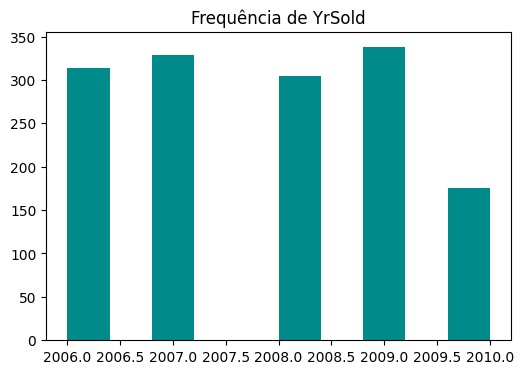

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(x=dataframe['YrSold'], color='darkcyan')
plt.title('Frequência de YrSold')
plt.show()

- Seaborn

Text(0.5, 1.0, 'Frequência de YrSold')

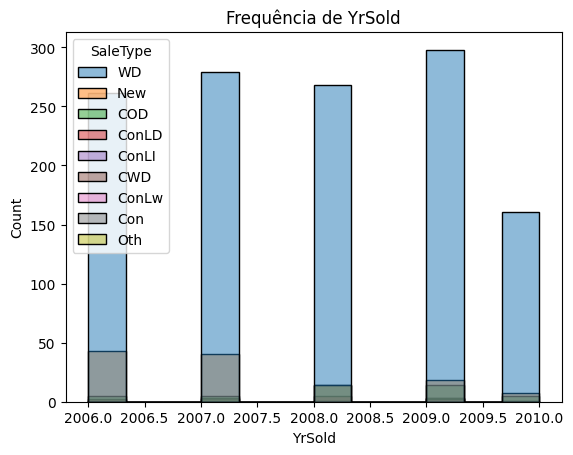

In [ ]:
sns.histplot(x=dataframe['YrSold'], hue=dataframe['SaleType']).set_title('Frequência de YrSold')

- Plotly

In [ ]:
fig = px.histogram(dataframe,
                   x='YrSold',
                   title='Frequência de YrSold',
                   color_discrete_sequence=['darkcyan'], nbins=5) # nbins -> espessura do intervalo de valores, category_orders=dict(day=["Values"]), log_y e log_x, histnorm -> normalização
fig.update_layout(bargap=0.2)
fig.show()

## Análise Bivariada

Importante verificar se as variáveis da análise bivariada tem correlação entre si, pois senão não há sentido em fazer uma plotagem e analisá-las em conjunto.

<ipython-input-35-7f730b27448b>:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



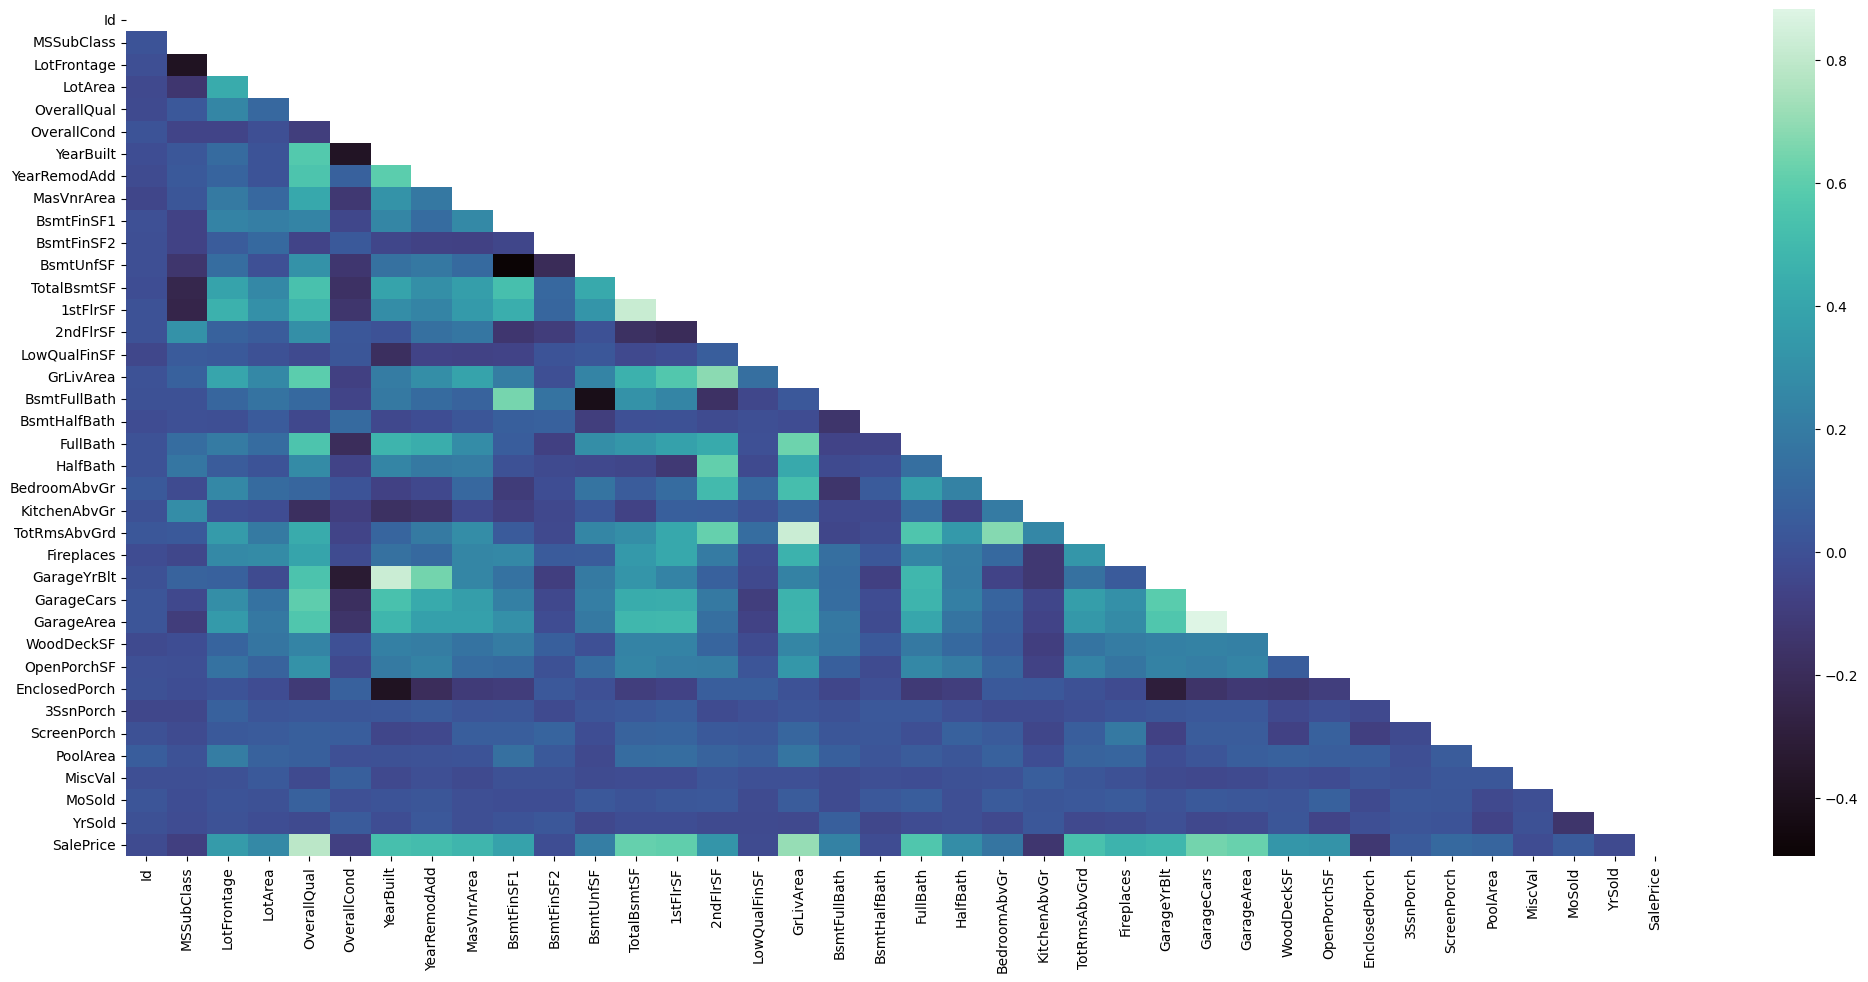

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = dataframe.select_dtypes(include=numerics)

corr = df_numeric.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25, 11))
sns.heatmap(dataframe.corr(), mask=mask, cmap='mako') # annot=None para mostrar os valores
plt.show()

#### Obs: Seaborn - CMaps

 - https://seaborn.pydata.org/tutorial/color_palettes.html

- Matplotlib

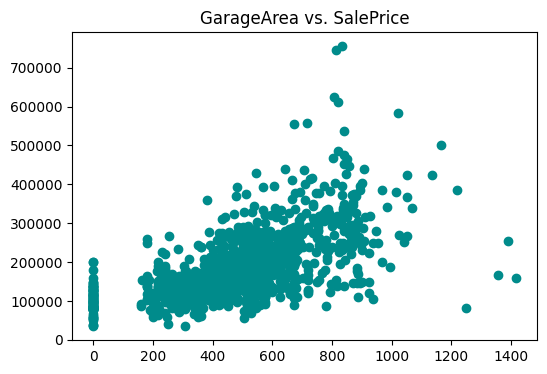

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(x=dataframe['GarageArea'], y=dataframe['SalePrice'], color='darkcyan')
plt.title('GarageArea vs. SalePrice')
plt.show()

- Seaborn

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

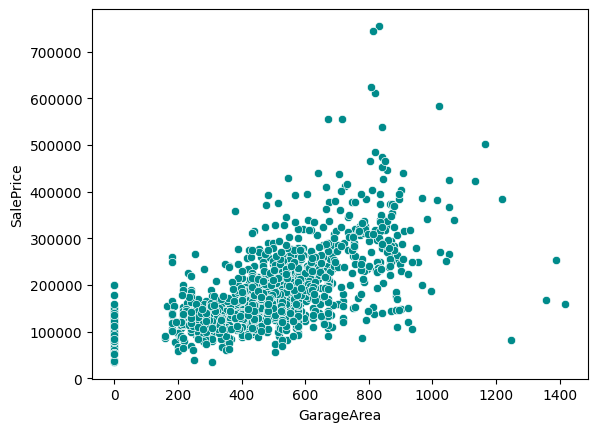

In [ ]:
sns.scatterplot(x=dataframe['GarageArea'], y=dataframe['SalePrice'], color='darkcyan')

- Plotly

In [ ]:
px.scatter(dataframe,x='GarageArea',y='SalePrice')

## **Análise de Cores**

### **Lista de Cores nomeadas do CSS**

aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen

### **Circulo Cromático**
- Análise de Combinação de Cores
- Transições suaves entre cores

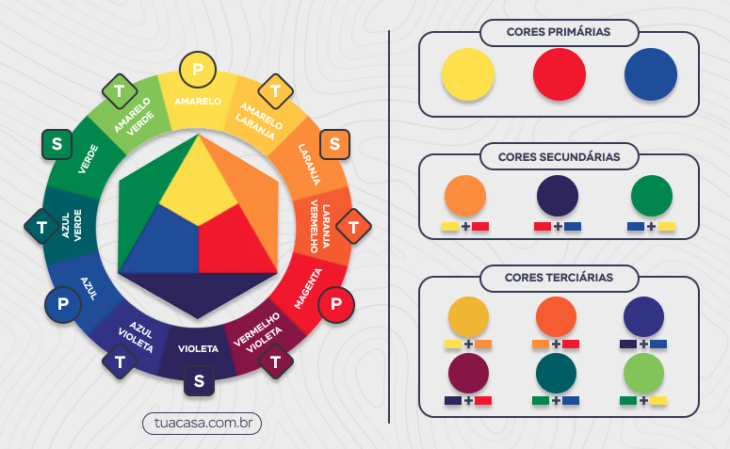

### **Harmonia de Cores**

Combinações de Cores visualmente agradáveis

- Harmonia Complementar: cores opostas no círculo cromático

- Harmonia Análoga: cores próximas no círculo cromático

- Harmonia Triádica: três corês igualmente espaçadas no círculo cromático



### Harmonia Complementar :

In [ ]:
dataframe_complementar = dataframe[(dataframe['FullBath'] == 2) | (dataframe['FullBath'] == 3)]
dataframe_complementar["FullBath"] = dataframe_complementar["FullBath"].astype(str) # float para contínuo
dataframe_complementar["FullBath"]
px.scatter(dataframe_complementar.sort_values(by='FullBath'), x='GrLivArea', y='SalePrice', color='FullBath', color_discrete_sequence=['blue','orange'])


<ipython-input-20-a4f3682c76b1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Harmonia Análoga:

In [ ]:
dataframe["FullBath"] = dataframe["FullBath"].astype(str) # float para contínuo
dataframe["FullBath"]
px.scatter(dataframe.sort_values(by='FullBath'), x='GrLivArea', y='SalePrice', color='FullBath', color_discrete_sequence=['#9933cc','#7F00FF', '#c71585', '#FF00FF'])

# Blue violet, violet, red violet, magenta

### Harmonia Triádica:

In [ ]:
dataframe["FullBath"] = dataframe["FullBath"].astype(float)
dataframe_fullbath = dataframe[(dataframe['FullBath'] == 1) | (dataframe['FullBath'] == 2) | (dataframe['FullBath'] == 3)]

dataframe_fullbath["FullBath"] = dataframe_fullbath["FullBath"].astype(str) # float para contínuo


px.scatter(dataframe_fullbath.sort_values(by='FullBath'),
           x='GrLivArea',
           y='SalePrice',
           color='FullBath',
           color_discrete_sequence=['green','yellow', 'orange'])

<ipython-input-109-59f025143b0f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Combinação de Cores com Contextos

#### Cores e Ideias

In [ ]:
# ERRADO

lista = ['Yes', 'No', 'Yes', 'Yes', 'Yes', 'No']

px.histogram(lista, color=lista, color_discrete_sequence=['red','blue'])

In [ ]:
# CERTO

px.histogram(lista, color=lista, color_discrete_sequence=['blue','red'])

### Observação: padrões de relação de ideias com cores pode mudar em relação a regiões, etnias, culturas etc. Por exemplo, na China é utilizado azul para negativo e vermelho para positivo

### **Psicologia das Cores**

- **Vermelho**: Energia, Paixão. Perigo, Alerta
- **Azul**: Tranquilidade, Confiança. Ambientes Profissionais
- **Verde**: Natureza, Crescimento. Produtos Ecológicos
- **Amarelo**: Alegria, Otimismo, Criatividade, Juventude
- **Laranja**: Entusiasmo, Calor. Estimular o Apetite (Logotipos de Alimentos)
- **Roxo**: Realeza, Espiritualidade, Mistério. Menção ao Luxo
- **Preto**: Elegância, Sofisticação, Mistério. Marcas de Moda e Produtos de Luxo
- **Branco**: Pureza, Simplicidade, Paz. Designs minimalistas e limpos

### **Outras ideias para melhorar a Visualização de Dados**
- **Menos é mais**: Usar o necessário, quanto mais claro mais fácil de entender
- **Fontes de Texto**: Utilizar um padrão de fonte, entre 1 a 3 no máximo em apresentações. Fontes fáceis de ler e que fazem sentido juntas.
- **Acessibilidade**: Pense no público, e garanta que entenderão (exemplo descrição em áudio para deficientes auditivos)

## **Cores e Identificação Visual**

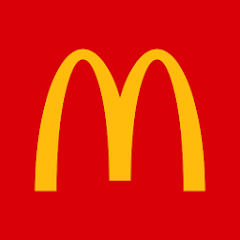

In [ ]:
# Com go é possível criar gráficos mais customizados, desta maneira é possível atribuir a identidade visual da empresa a sua visualização dos dados

import plotly.graph_objects as go
colors = ['red','yellow']


fig = go.Figure(data=[go.Pie(labels=['No','Yes'],
                             values=pd.Series(lista).value_counts().sort_values(ascending=True))])

fig.update_layout(
    paper_bgcolor='black',
        legend=dict(
        x=0,
        y=1,
        traceorder="reversed",
        title_font_family="Times New Roman",
        font=dict(
            family="Courier",
            size=20,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
    )
)
fig.update_traces(textfont_size=20,
                  marker=dict(colors=colors,
                              line=dict(color='#F5F5F5', width=1)))

fig.show()

## Multi Plotagem

- Matplotlib

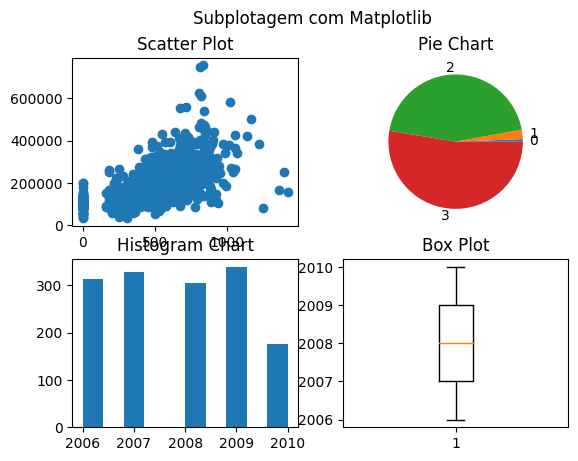

In [ ]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2)
fig.suptitle('Subplotagem com Matplotlib')
ax1.scatter(x=dataframe['GarageArea'],y=dataframe['SalePrice'])
ax1.set_title('Scatter Plot')
ax2.pie(x=sorted(dataframe['FullBath'].value_counts()), labels=[0,1,2,3])
ax2.set_title('Pie Chart')
ax3.hist(x=dataframe['YrSold'])
ax3.set_title('Histogram Chart')
ax4.boxplot(x=dataframe['YrSold'])
ax4.set_title('Box Plot')
fig.show()


# Títulos nos plots: ax.suptitle()


- Seaborn

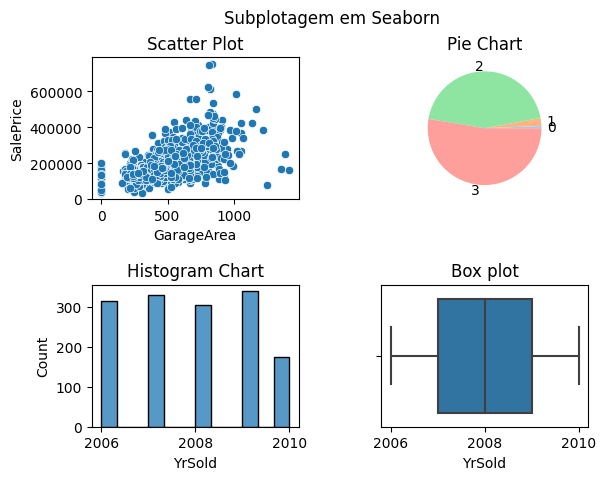

In [ ]:
fig = plt.figure()
fig.suptitle('Subplotagem em Seaborn')
fig.subplots_adjust(hspace=0.6, wspace=0.4)
ax = fig.add_subplot(2,2,1) #número de linhas | número de colunas | índice do subplot
sns.scatterplot(x=dataframe['GarageArea'],y=dataframe['SalePrice'])
ax.set_title('Scatter Plot')
ax = fig.add_subplot(2,2,2)
colors = sns.color_palette('pastel')[0:5]
plt.pie(x=sorted(dataframe['FullBath'].value_counts()), labels=[0,1,2,3], colors=colors)
ax.set_title('Pie Chart')
ax = fig.add_subplot(2,2,3)
sns.histplot(x=dataframe['YrSold'])
ax.set_title('Histogram Chart')
ax = fig.add_subplot(2,2,4)
sns.boxplot(x=dataframe['YrSold'])
ax.set_title('Box plot')
plt.show()

- Plotly

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'xy'}, {'type': 'domain'}],
                                           [{'type': 'box'}, {'type': 'xy'}]],
                    subplot_titles=['Scatter Plot', 'Pie Chart', 'Box Plot', 'Histogram Chart'])

fig.add_trace(
    go.Scatter(x=dataframe['GarageArea'],y=dataframe['SalePrice'], mode='markers'),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=[0,1,2,3], values=dataframe['FullBath'].value_counts()),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(x=dataframe['YrSold']),
    row=2, col=1
)

fig.add_trace(
    go.Box(y=dataframe['YrSold']),
    row=2, col=2
)



fig.update_layout(height=800, width=800, title_text="Subplotagem em Plotly")
fig.show()

## Salvar imagens para posteriormente colocar em apresentações

- Matplotlib

In [ ]:
plt.savefig('grafico-matplotlib.png')

- Seaborn

In [ ]:
plt.savefig('grafico-seaborn.png')

- Plotly

In [ ]:
fig.write_image('grafico-plotly.png')